In [2]:
import pandas as pd
import networkx as nx
from modules import ps
import sys
sys.path.append("C:/Users/kubic/Desktop/machine learning/Polarization/")

import functions

In [12]:
congresses= ['095', '096', '097','098', '099', '100', '101', '102', '103','104', '105', '106', '107','108', '109', '110', '111', '112','113', '114', '115', '116','117','118']

In [6]:
for congress in congresses:
    functions.clean_and_prepare_congress_data(congress)


In [7]:
for congress in congresses:
    functions.construct_congress_network(congress)

In [13]:
pol_scores = {}
for congress in congresses:
    pol_score = functions.calc_pol(congress)  # Run function
    pol_scores[int(congress)] = pol_score  
    print(f"Congress {int(congress)}: Polarization Score = {pol_score}")

Congress 95: Polarization Score = 2.813638588027456
Congress 96: Polarization Score = 4.13022200589418
Congress 97: Polarization Score = 3.5095082658647563
Congress 98: Polarization Score = 8.895562390429738
Congress 99: Polarization Score = 26.8387727352267
Congress 100: Polarization Score = 32.82015944002752
Congress 101: Polarization Score = 16.03677498953517
Congress 102: Polarization Score = 12.089040475233304
Congress 103: Polarization Score = 120.17622990623457
Congress 104: Polarization Score = 199.35872172324508
Congress 105: Polarization Score = 164.9364765070499
Congress 106: Polarization Score = 7.531297995258888
Congress 107: Polarization Score = 8.702001871252023
Congress 108: Polarization Score = 115.20643328742631
Congress 109: Polarization Score = 43.948831612206035
Congress 110: Polarization Score = 129.33156385782698
Congress 111: Polarization Score = 89.47649481463665
Congress 112: Polarization Score = 43.54369601150088
Congress 113: Polarization Score = 83.95152401

This is just average shortest path

In [19]:
data_path = "data/USA/"  # Adjust if needed

for congress in congresses:
    edge_df = pd.read_csv(f"{data_path}H{congress}_USA_edgelist.csv", delimiter=",")
    
    # Remove any rows with non-numeric values in 'Source' or 'Target' columns
    edge_df = edge_df[pd.to_numeric(edge_df['Source'], errors='coerce').notna()]
    edge_df = edge_df[pd.to_numeric(edge_df['Target'], errors='coerce').notna()]
    
    # Create the graph using the cleaned edge list
    G = nx.from_pandas_edgelist(edge_df, 'Source', 'Target')
    

    
    # Ensure the graph is connected
    if not nx.is_connected(G):
        largest_component = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_component).copy()  # Take the largest component

    # Compute average shortest path length
    avg_path_length = nx.average_shortest_path_length(G)
    print(congress,", ",avg_path_length)

095 ,  1.8639868068439498
096 ,  1.945652739205958
097 ,  1.9509412377557378
098 ,  2.327758188493983
099 ,  2.5574936811558024
100 ,  2.6852039759784634
101 ,  2.2635185976043766
102 ,  2.0933501605770513
103 ,  3.0153370439084726
104 ,  5.2385295831347
105 ,  2.764873222016079
106 ,  1.7831684188827046
107 ,  1.7223171252516625
108 ,  2.870031183150456
109 ,  2.302478118738796
110 ,  3.1220940192472413
111 ,  2.2327146745854987
112 ,  2.1627315803388036
113 ,  2.307558663064781
114 ,  2.70056715648363
115 ,  2.1809948032665183
116 ,  1.7792953929539295
117 ,  2.6196260031787766
118 ,  2.8100741364954205


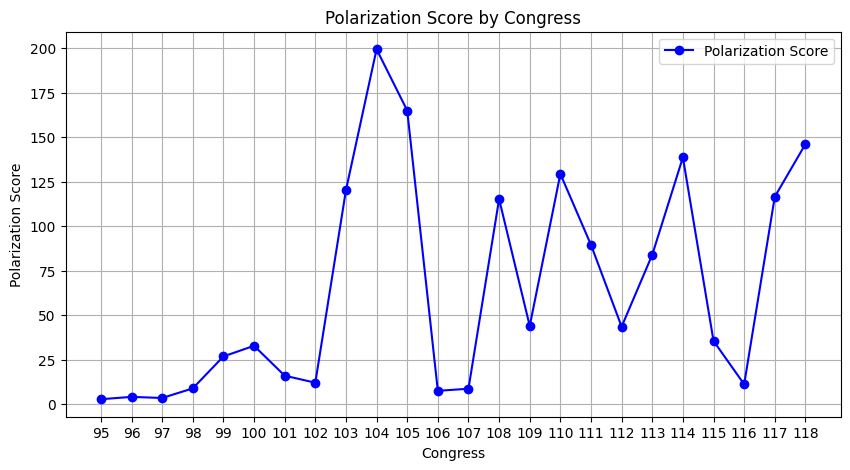

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(pol_scores.keys(), pol_scores.values(), marker='o', linestyle='-', color='b', label="Polarization Score")
plt.xlabel("Congress")
plt.ylabel("Polarization Score")
plt.title("Polarization Score by Congress")
plt.xticks(list(pol_scores.keys()))  # Set x-axis labels to be congress numbers
plt.legend()
plt.grid(True)
plt.show()

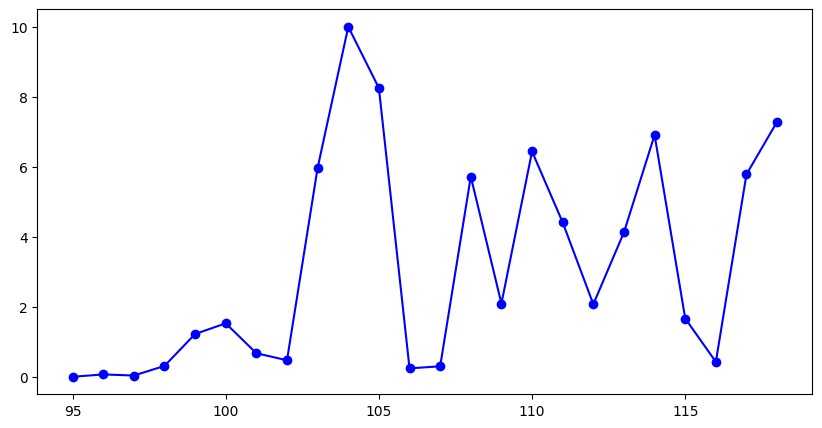

In [15]:
min_val, max_val = min(pol_scores.values()), max(pol_scores.values())
scaled_scores = {k: 10 * (v - min_val) / (max_val - min_val) for k, v in pol_scores.items()}

# Plot
plt.figure(figsize=(10, 5))
plt.plot(scaled_scores.keys(), scaled_scores.values(), marker='o', linestyle='-', color='b', label="Standardized Polarization")

In [61]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
# Compute pairwise distances using cosine similarity
dist_matrix = pairwise_distances(sparse_matrix_us.toarray(), metric='cosine')

# Apply MDS with 2 components
n_components = 2
mds = MDS(n_components=n_components, dissimilarity="precomputed", normalized_stress='auto', random_state=42)
mds_transformed = mds.fit_transform(dist_matrix)

# Extract the first component
raw_values = mds_transformed[:, 0]

# Standardize to range [-1, 1]
min_val, max_val = raw_values.min(), raw_values.max()
standardized_values = 2 * (raw_values - min_val) / (max_val - min_val) - 1

# Store as dictionary with row indices as keys
opinions_x = {index: value for index, value in zip(sparse_df.index, mds_transformed[:, 0])}
opinions_x

{267: 0.02477234846428479,
 633: -0.02633667594888119,
 830: 0.08474330180554274,
 835: 0.2804496694738713,
 948: 0.12806642373132116,
 1077: 0.13503944261745682,
 1087: -0.22204523307484136,
 1265: 0.18506938655507113,
 1282: -0.06039532198226656,
 1610: -0.16662715907506948,
 2009: -0.05228096983489422,
 2476: 0.13559215444119102,
 2513: 0.442644368782808,
 2525: -0.20613112771615955,
 2533: -0.24313932468194438,
 2594: 0.16192686568315467,
 2605: 0.26174470820473816,
 3078: 0.1375438026379007,
 3224: 0.13615460204095803,
 3242: -0.01377073072910687,
 3321: -0.04606777549699499,
 3553: 0.27161098616561713,
 4957: 0.184326159295119,
 5101: 0.09410755492307488,
 5495: -0.20759069100206606,
 5924: 0.06090409030920346,
 6240: 0.14511657865182104,
 6455: -0.14578161958671534,
 6584: 0.10309252946965333,
 6661: 0.13491157508446786,
 6756: 0.33373655712758116,
 6845: 0.04923356478290302,
 6936: 0.296747582536401,
 7081: 0.8241737949731133,
 7333: 0.00447736258980321,
 7343: 0.08184779157745

## Polarization of pca on sparse matrix

In [ ]:
# Function to compute polarization score
def calc_pol(edge_list_path, opinions):
    G = nx.read_edgelist(edge_list_path, delimiter=",")
    G = nx.relabel_nodes(G, lambda x: int(x))  # Convert all nodes to integers
    #o = {int(node): opinions[int(node)] for node in G.nodes if int(node) in opinions}
    import numpy as np

    opinion_values = list(o.values())
    print("Opinion Variance:", np.var(opinion_values))
    

    return ps.ge(opinion_values, {}, G)  

pol_score = calc_pol(edge_list_file, opinions)

print(f"Polarization score: {pol_score}")


NameError: name 'o' is not defined

## Polarization on the nominate score

In [ ]:

G = nx.relabel_nodes(G, lambda x: int(x))  # Convert nodes to integers

# Load the member data
members_df = pd.read_csv("data/USA/H095_members.csv")

# Drop rows where nominate_dim1 is missing (NaN)
members_df = members_df.dropna(subset=["nominate_dim1"])

# Convert ICPSR to integer
members_df["icpsr"] = members_df["icpsr"].astype(int)

# Create opinions_x dictionary {icpsr: nominate_dim1}
opinions_x = dict(zip(members_df["icpsr"], members_df["nominate_dim1"]))

# Ensure only nodes present in the graph are included
opinions = {node: opinions_x[node] for node in G.nodes if node in opinions_x}
# Standardize opinions between -1 and 1 using Min-Max Scaling
min_opinion = min(opinions.values()edge_list_path = "USA_95_edge_list.csv"
G = nx.read_edgelist(edge_list_path, delimiter=","))
max_opinion = max(opinions.values())

opinions = {
    k: 2 * (v - min_opinion) / (max_opinion - min_opinion) - 1
   for k, v in opinions.items()
}

{14404: -0.18287937743190663,
 11023: -0.43060959792477294,
 11007: 0.16601815823605715,
 11037: -0.20103761348897542,
 14219: -0.18158236057068744,
 10788: -0.4824902723735408,
 14276: 0.16212710765239957,
 14410: 0.19325551232166016,
 12014: -0.33722438391699094,
 14467: -0.4539559014267185,
 14026: -0.26977950713359267,
 13048: -0.46433203631647213,
 12038: -0.46433203631647213,
 14016: -0.42801556420233455,
 8032: -0.25680933852140075,
 10446: -0.5901426718547341,
 14451: -0.3696498054474707,
 14429: -0.2970168612191958,
 14227: 0.2529182879377432,
 10587: -0.37094682230869,
 14455: -0.5447470817120622,
 14000: 0.16601815823605715,
 14259: 0.16472114137483795,
 14004: 0.23865110246433208,
 14234: -0.2957198443579766,
 14061: -0.05836575875486383,
 10625: 0.09857328145265876,
 13027: -0.47600518806744485,
 8507: -0.3125810635538262,
 10075: -0.35538261997405973,
 8564: -0.5110246433203631,
 11005: -0.24124513618677035,
 11036: 0.1595330739299612,
 5924: -0.36446173800259407,
 14419:

In [4]:
# Function to compute polarization score
def calc_pol(edge_list_path, opinions):
    G = nx.read_edgelist(edge_list_path, delimiter=",")
    G = nx.relabel_nodes(G, lambda x: int(x))  # Convert all nodes to integers
    o = {int(node): opinions[int(node)] for node in G.nodes if int(node) in opinions}

    

    return ps.ge(o, {}, G)  

pol_score = calc_pol(edge_list_file, opinions)

print(f"Polarization score: {pol_score}")


NameError: name 'edge_list_file' is not defined

## Opinions distribution

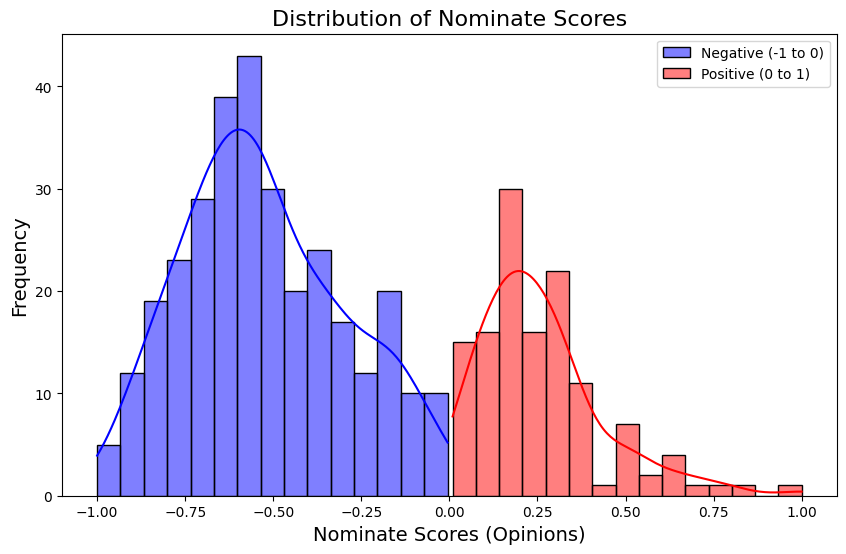

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

opinions_series = pd.Series(opinions)
opinions_neg = opinions_series[opinions_series < 0]  # Negative opinions (-1 to 0)
opinions_pos = opinions_series[opinions_series >= 0]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot negative opinions in blue
sns.histplot(opinions_neg, bins=15, kde=True, color="blue", label="Negative (-1 to 0)")

# Plot positive opinions in red
sns.histplot(opinions_pos, bins=15, kde=True, color="red", label="Positive (0 to 1)")

# Labels and title
plt.xlabel("Nominate Scores (Opinions)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Nominate Scores", fontsize=16)
plt.legend()

# Show the plot
plt.show()

In [11]:
def calc_pol(edge_list_path,opinions):
    G = nx.read_edgelist(edge_list_path, delimiter=',', comments='s', data=False, nodetype=int)
    o = pd.read_csv(opinions, sep=",").set_index("icpsr")["nominate_dim1"].to_dict()
    return ps.ge(o, {}, G)

members = "data/USA/H095_members.csv"
edge_list_path = "USA_95_edge_list.csv"
print(calc_pol(edge_list_path,members))

2.1693153513691708
